# Limpieza de Datos de visitas19

### Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura del archivo visitas.csv

In [3]:
dataframe_general= pd.read_csv('visita19.csv')

### Selección de columnas

In [4]:
predataframe1=dataframe_general.iloc [:, [1,4,5,11,13,17,18,19,21]]
predaraframe2=dataframe_general.iloc [:, 23:66] 
dataframe_seleccion= pd.concat([predataframe1,predaraframe2], axis=1)

### Proceso de limpieza de datos

In [5]:
#Para VISIT_ANIO
aux=dataframe_seleccion['VISIT_ANIO,C,2'].dropna()
dataframe_seleccion['VISIT_ANIO,C,2'].fillna(aux.mode(), inplace=True)
#Para MEDIO_2
aux=dataframe_seleccion['MEDIO_2,C,2'].dropna()
dataframe_seleccion['MEDIO_2,C,2'].fillna(aux.mode(), inplace=True)
#Para TAM_GRUPO
aux=dataframe_seleccion['TAM_GRUPO,C,3'].dropna()
dataframe_seleccion['TAM_GRUPO,C,3'].fillna(aux.mode(), inplace=True)
#Para MENORES
aux=dataframe_seleccion['MENORES_12,C,3'].dropna()
dataframe_seleccion['MENORES_12,C,3'].fillna(aux.mode(), inplace=True)
#Para NIV_APREND
aux=dataframe_seleccion['NIV_APREND,C,2'].dropna()
dataframe_seleccion['NIV_APREND,C,2'].fillna(aux.mode(), inplace=True)

### Tratamiento de inconsistencias.

In [6]:
#Eliminar inconsistencias en Duracion Visitas al año
condicion_visit=(dataframe_seleccion['VISIT_ANIO,C,2']!=98) &(dataframe_seleccion['VISIT_ANIO,C,2']!=99)
dataframe_seleccion=dataframe_seleccion[condicion_visit]
#Eliminar inconsistencias en Tamaño del grupo
condicion_tam=(dataframe_seleccion['TAM_GRUPO,C,3']!=999)
dataframe_seleccion=dataframe_seleccion[condicion_tam]
#Eliminar inconsistencias en Tamaño del grupo menores de 12
condicion_menores=(dataframe_seleccion['MENORES_12,C,3']!=999)
dataframe_seleccion=dataframe_seleccion[condicion_menores]
#Eliminar inconsistencias en nivel de aprendizaje
condicion_ap=(dataframe_seleccion['NIV_APREND,C,2']!=99)
dataframe_seleccion=dataframe_seleccion[condicion_ap]
#Eliminar inconsistencias en Duracion Visitas en horas
condicion_vish=(dataframe_seleccion['DUR_VIS_H,N,2,0']!=98) &(dataframe_seleccion['DUR_VIS_H,N,2,0']!=99)
dataframe_seleccion=dataframe_seleccion[condicion_vish]
#Eliminar inconsistencias en Duracion Visitas en minutos
condicion_vism=(dataframe_seleccion['DUR_VIS_M,N,2,0']!=99)
dataframe_seleccion=dataframe_seleccion[condicion_vism]
#Eliminar datos inconsistentes en el campo Sexo
condicion_edad=(dataframe_seleccion['EDAD,N,2,0']!=98) &(dataframe_seleccion['EDAD,N,2,0']!=99)
dataframe_seleccion=dataframe_seleccion[condicion_edad]

### Visualización de algunos datos estadisticos

In [7]:
print(dataframe_seleccion['EDAD,N,2,0'].describe())
print(dataframe_seleccion['VISIT_ANIO,C,2'].describe())
print(dataframe_seleccion['NIV_APREND,C,2'].describe())
print(dataframe_seleccion['TAM_GRUPO,C,3'].describe())
print(dataframe_seleccion['MENORES_12,C,3'].describe())
print(dataframe_seleccion['DUR_VIS_H,N,2,0'].describe())
print(dataframe_seleccion['DUR_VIS_M,N,2,0'].describe())

count    180747.000000
mean         34.110823
std          14.847694
min          12.000000
25%          22.000000
50%          31.000000
75%          43.000000
max          97.000000
Name: EDAD,N,2,0, dtype: float64
count    50824.000000
mean         2.268987
std          3.405377
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         30.000000
Name: VISIT_ANIO,C,2, dtype: float64
count    179389.000000
mean          8.990802
std           1.366201
min           0.000000
25%           8.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: NIV_APREND,C,2, dtype: float64
count    158443.000000
mean          5.476588
std          13.966455
min           1.000000
25%           1.000000
50%           3.000000
75%           4.000000
max         990.000000
Name: TAM_GRUPO,C,3, dtype: float64
count    158443.000000
mean          0.753571
std           3.873936
min           0.000000
25%           0.000000
50%           

#### Mediana

In [8]:
varianza=dataframe_seleccion.var()
moda=dataframe_seleccion.mode()
mediana=dataframe_seleccion.median()
diccionario={'Categorias':list(dataframe_seleccion),'Mediana':list(mediana)}
#print(diccionario)
datos= pd.DataFrame(diccionario)
datos

,Categorias,Mediana
0,"ENT_REGIS,C,2",14.0
1,"SEXO,N,1,0",2.0
2,"EDAD,N,2,0",31.0
3,"ESCOLARIDA,N,2,0",9.0
4,"OCUPACION,N,2,0",11.0
5,"ESTIM_FAM,N,1,0",1.0
6,"PRIM_VISIT,N,1,0",1.0
7,"VISIT_ANIO,C,2",1.0
8,"VIS_OTROS,N,1,0",1.0
9,"MEDIO_1,C,2",3.0


In [9]:
moda=dataframe_seleccion.mode()
print(moda)

   ENT_REGIS,C,2  SEXO,N,1,0  EDAD,N,2,0  ESCOLARIDA,N,2,0  OCUPACION,N,2,0  \
0              9           2          18                 9               11   

   ESTIM_FAM,N,1,0  PRIM_VISIT,N,1,0  VISIT_ANIO,C,2  VIS_OTROS,N,1,0  \
0                1                 1             0.0                1   

   MEDIO_1,C,2  ...  SU_BIBLIOT,N,1,0  SU_ARCHIVO,N,1,0  SU_SILLA,N,1,0  \
0            3  ...                 0                 0               0   

   SU_OTRO,N,1,0  OPIN_EXPOS,N,1,0  NIV_APREND,C,2  DUR_VIS_H,N,2,0  \
0              0                 1            10.0                0   

   DUR_VIS_M,N,2,0  REPETIR_VI,N,1,0  RECOMIE_VI,N,2,0  
0               30                 1                13  

[1 rows x 52 columns]


### Graficos

#### En los graficos siguientes se muestran los datos ordinales o numericos encontrados en la base de datos, es decir solo consta de 7 variables de ese estilo, las cuales son:

-Edad

-Visitas al año

-Nivel de aprendizaje

-Tamaño de grupo

-Tamaño de grupo menor a 12

-Duración de visita en horas

-Duracion de visita en minutos

Text(0.5, 1.0, 'GRAFICA DE CAJA EDAD')

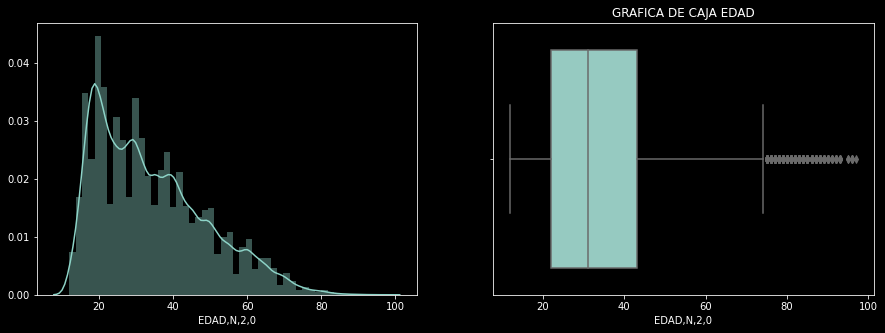

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dataframe_seleccion['EDAD,N,2,0'])
plt.subplot(1,2,2)
plt.style.use('dark_background')
sns.boxplot(x=dataframe_seleccion["EDAD,N,2,0"])
plt.title("GRAFICA DE CAJA EDAD")

#### Segun los datos arrojados por la base de datos y con la ayuda del tratamiento de datos eliminando algunas inconsistencias se hizo la grafica que nos arrojo que el rango principal de edades de la poblacion esta entre los 20 y 42 años, eso quiere decir que la mayoria de los datos se encientra muy cercano al promedio que es de 34 años, ademas en la grafica de la izquierda podemos ver la distribucion de los datos en un histograma.

Text(0.5, 1.0, 'GRÁFICA DE CAJA VISITAS AL AÑO')

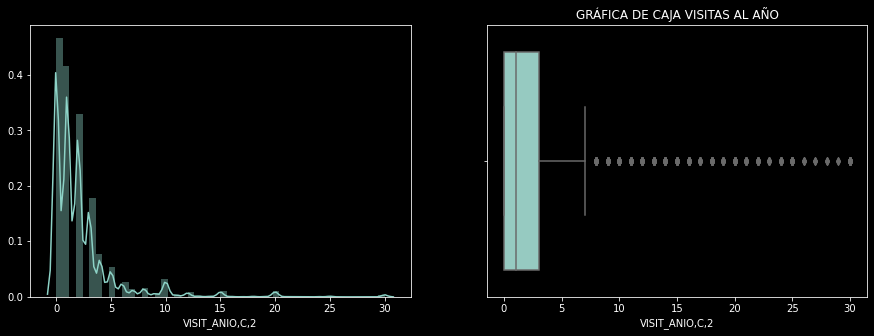

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dataframe_seleccion['VISIT_ANIO,C,2'])
plt.subplot(1,2,2)
sns.boxplot(x=dataframe_seleccion["VISIT_ANIO,C,2"])
plt.title("GRÁFICA DE CAJA VISITAS AL AÑO")

#### Segun los datos arrojados por la base de datos y con la ayuda del tratamiento de datos eliminando algunas inconsistencias se hizo las graficas correpondientes donde se logra observar una gran cantidad de datos sesgados, que no fueron limpiados por la razon de no perder informacion importante, pero la mayoria de los encuenstados arrojo que solo asisten una vez al año al museo o a lo mucho 5 ocaciones, posteriormente se analizara esta variable en conjunto con demas variables de analisis.

Text(0.5, 1.0, 'GRÁFICA DE CAJA NIVEL DE APRENDIZAJE')

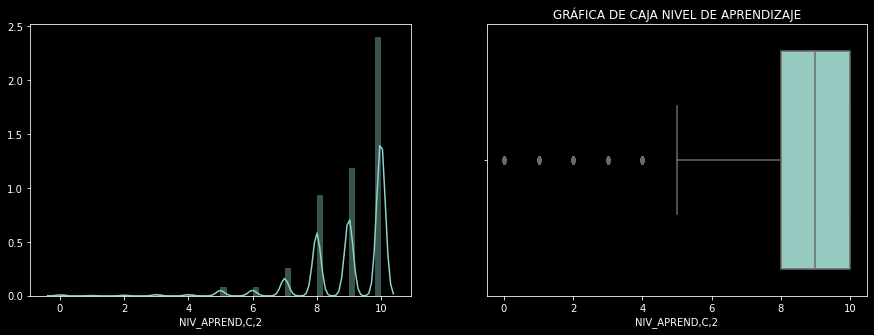

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dataframe_seleccion['NIV_APREND,C,2'])
plt.subplot(1,2,2)
sns.boxplot(x=dataframe_seleccion["NIV_APREND,C,2"])
plt.title("GRÁFICA DE CAJA NIVEL DE APRENDIZAJE")

#### Segun los datos arrojados por la base de datos y con la ayuda del tratamiento de datos eliminando algunas inconsistencias se hicieron las graficas que nos indica que la mayoria de los encuestados que asistieron a un museo aprendieron algo de esa visita la mayoria de los datos se encuentra en calificaiones satisfactorias es decir de 8 a 10 donde el promedio de esta variable es de 9, lo cual nos permite sacar una conclusion de que la mayoria aprende algo al asistir a un museo.

Text(0.5, 1.0, 'GRÁFICA DE CAJA TAMAÑO DE GRUPO')

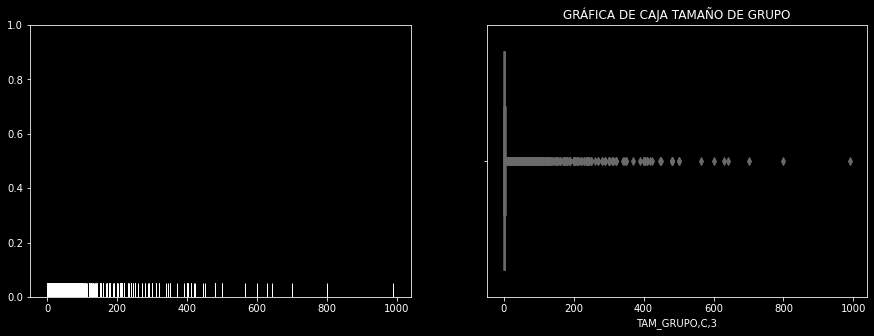

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.rugplot(dataframe_seleccion['TAM_GRUPO,C,3'])
plt.subplot(1,2,2)
sns.boxplot(x=dataframe_seleccion["TAM_GRUPO,C,3"])
plt.title("GRÁFICA DE CAJA TAMAÑO DE GRUPO")

#### Segun los datos arrojados por la base de datos y con la ayuda del tratamiento de datos eliminando algunas inconsistencias se hicieron las siguientes graficas que estan muy cesgados los datos, como sabemos en la eduacion mexicana normalmente se le solicita a un grupo de alumnos asistir a un museo, por ese motivo el tamaño de grupo oscila demasiado, incluso muchas instituciones hacen escursiones a museos donde siendo conservador asisten 30 personas y exgageradamente van grupos de 500 personas, entonces a esto podemos decir que se debe ese cesgo

Text(0.5, 1.0, 'GRÁFICA DE CAJA DE TAMAÑO DE GRUPO MENORES DE 12 AÑOS')

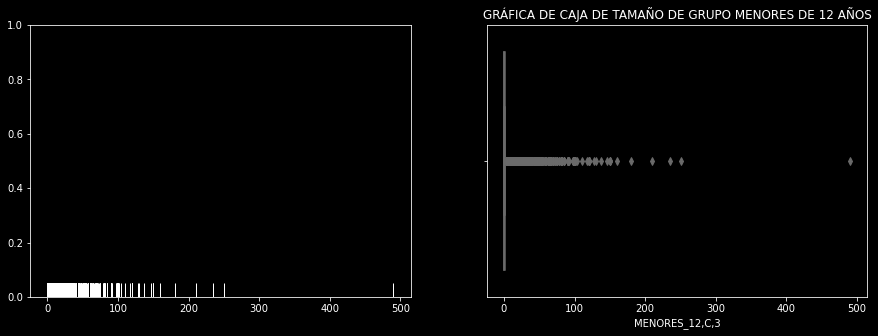

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.rugplot(dataframe_seleccion['MENORES_12,C,3'])
plt.subplot(1,2,2)
sns.boxplot(x=dataframe_seleccion["MENORES_12,C,3"])
plt.title("GRÁFICA DE CAJA DE TAMAÑO DE GRUPO MENORES DE 12 AÑOS")

#### De igual manera que el punto anterior los datos estan cesgados por que muchas escuelas realizan escursiones, por ejemplo el tamaño maximo en esta categoria fue de 480 personas menores de 12 años donde da mas argumentos a la afirmacion de que las escuelas hacen escursiones a los museos, mas adelante en el documento se compararan esta variable con otras mas para poder seguir dando ese argumento de que asisten por escursiones escolares o proyectos estudiantiles.

Text(0.5, 1.0, 'GRÁFICA DE CAJA DURACION DE LA VISISTA EN HORAS')

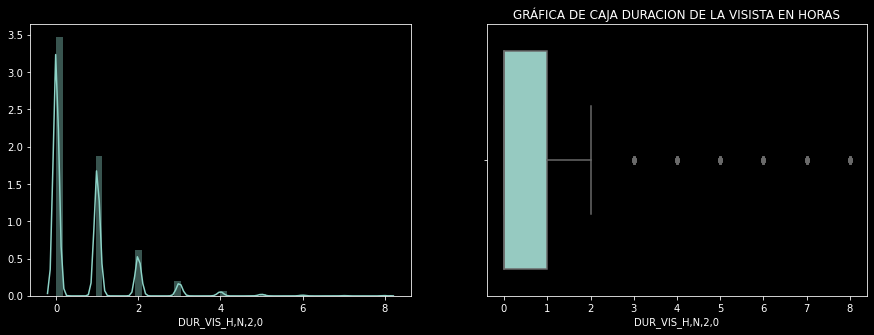

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dataframe_seleccion['DUR_VIS_H,N,2,0'])
plt.subplot(1,2,2)
sns.boxplot(x=dataframe_seleccion["DUR_VIS_H,N,2,0"])
plt.title("GRÁFICA DE CAJA DURACION DE LA VISISTA EN HORAS")

#### Segun los datos arrojados por la base de datos y con la ayuda del tratamiento de datos eliminando algunas inconsistencias se hicieron las siguientes graficas, donde podemos ver que muchas personas no asisten al museo muchas horas lo cual nos puede servir en el futuro para ver que tipo de museo es y cual deberia de ser la estancia ideal en el museo para poder sacarle mayor provecho a esos datos, asi mismo como sabemos hay diferentes tipos  ya tamaños de museos  por lo que muchos aveces son muy pequeños y no tardan mas de una hora en recorrerlos pero de igual manera sabemos que puede ser un museo muy grande o con exposiciones temporales que nos tardamos demasiado en recorrer, hablando de la visita en horas podemos ver que la estancia promedio esta entre 0 a 1 hora.

Text(0.5, 1.0, 'GRÁFICA DE DURACION DE VISITA EN MINUTOS')

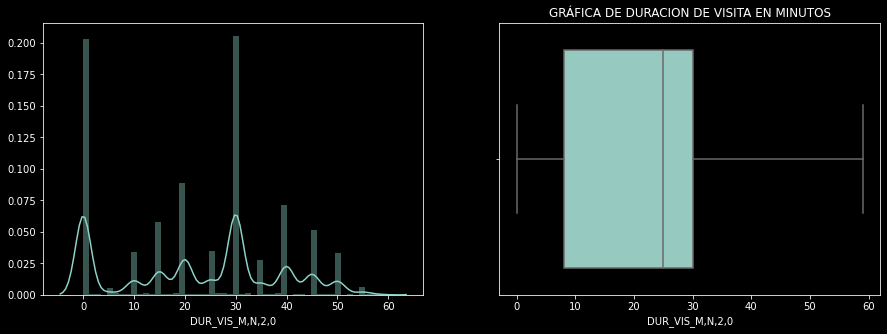

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dataframe_seleccion['DUR_VIS_M,N,2,0'])
plt.subplot(1,2,2)
sns.boxplot(x=dataframe_seleccion["DUR_VIS_M,N,2,0"])
plt.title("GRÁFICA DE DURACION DE VISITA EN MINUTOS")

#### Segun los datos arrojados por la base de datos y con la ayuda del tratamiento de datos eliminando algunas inconsistencias se hicieron las siguientes graficas donde es un como complemento de la categoria anterior donde podriamos decir que en ocasiones la asistencia es un poco obligatoria para asegurar o ver un poco mas a fondo este argumento mas adelante se podra analizar, hablando de los minutos podemos ver que la estancia promedio va de los 10 minutos a los 30 minutos.

#### En los siguientes graficos se muestran las variable:

1. Sexo

2. Repetir Visita

3. Acompañado por pareja

4. Acompañado por familiar

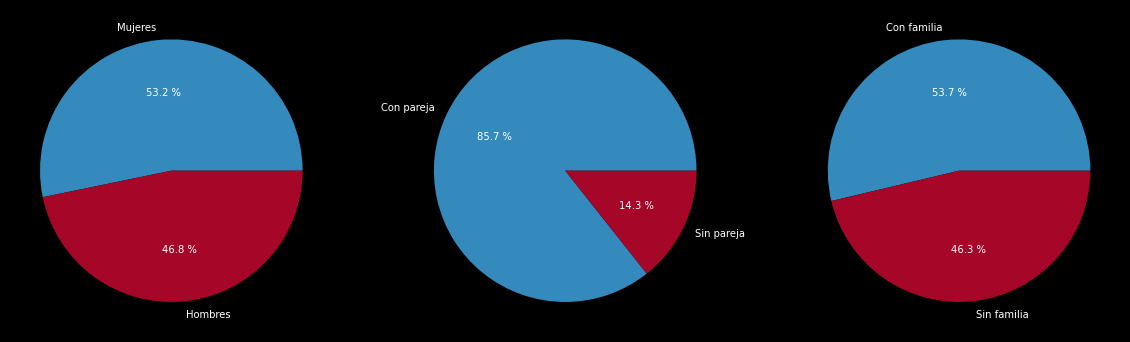

In [27]:
valores_sexo = dataframe_seleccion['SEXO,N,1,0'].value_counts()
sexo = ["Mujeres","Hombres"]
valores_repetir = dataframe_seleccion['REPETIR_VI,N,1,0'].value_counts()
repetir = ["Sí","No", "N.E"]
valores_asistencia_pareja = dataframe_seleccion['PAV_PAREJA,N,1,0'].value_counts()
acompa_nov = ["Con pareja","Sin pareja"]
valores_asistencia_familia = dataframe_seleccion['PAV_FAMILI,N,1,0'].value_counts()
acompa_fam = ["Con familia","Sin familia"]
plt.style.use('bmh')
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.pie(valores_sexo, labels=sexo, autopct="%0.1f %%")
plt.subplot(1,3,2)
plt.pie(valores_asistencia_pareja, labels=acompa_nov, autopct="%0.1f %%")
plt.subplot(1,3,3)
plt.pie(valores_asistencia_familia, labels=acompa_fam, autopct="%0.1f %%")
plt.show()

-Grafica 1
#### Podemos observar que asisten mas mujeres que hombres al museo por una diferencia de 6.8%

-Grafica 2
#### Podemos notar que la mayoria de los asistentes a museos van acompañados con su mareja con un 85.7%

-Grafica 3
#### Podemos ver que la mayoria de los asistentes prefiere ir solo o con otras personas que con su familia con un 53%

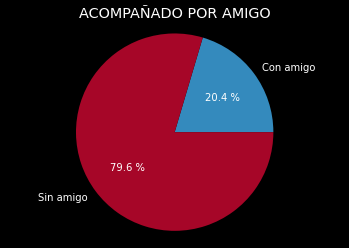

In [28]:
cantidad = [37977, 148148]
acompa_amigo = ["Con amigo","Sin amigo"]
plt.pie(cantidad, labels=acompa_amigo, autopct="%0.1f %%", )
plt.style.use('bmh')
plt.title("ACOMPAÑADO POR AMIGO")
plt.axis("equal")
plt.show()

#### En esta grafica podemos ver con que tipo de acompañante van los asistentes donde el 79.6% asiste sin sus amigos

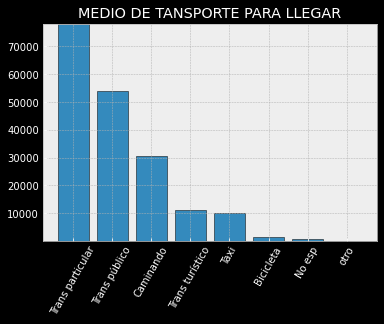

In [50]:
plt.style.use('bmh')
transporte = ["Trans particular","Trans público","Caminando", "Trans turístico", "Taxi", "Bicicleta", "No esp", "otro"]
cantidad = [78165, 54053, 30564, 11306, 9976, 1389, 650, 22]
plt.bar(range(8), cantidad, edgecolor = 'black')

plt.xticks(range(8), transporte, rotation=60)
plt.title("MEDIO DE TANSPORTE PARA LLEGAR")
plt.ylim(min(cantidad)-1, max(cantidad)+1)

plt.show()

#### En esta grafica podemos ver en que tipo de trasporte se trasladan los visitantes con 80,000 asistentes van en transporte particulas y 55,000 asistentes llegan entransporte publico y 30,000 asistentes llegan caminando a los museos, donde podemos ver los accesos de los museos pueden ser un poco dificiles de acceder.

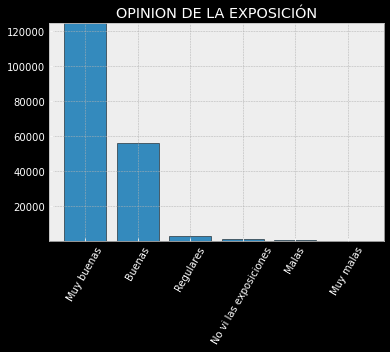

In [51]:
calidad = ["Muy buenas","Buenas","Regulares", "No vi las exposiciones", "Malas", "Muy malas"]
cantidad = [124228, 56224, 2862, 1245, 823, 306]

plt.bar(range(6), cantidad, edgecolor = 'black')

plt.xticks(range(6), calidad, rotation=60)
plt.title("OPINION DE LA EXPOSICIÓN")
plt.ylim(min(cantidad)-1, max(cantidad)+1)

plt.show()


#### En esta grafica se observa el opinion de las personas respecto a las exposiciones de los museos mas de 120,000 de comentarios que las exposiciones son muy buenas, si consideramos que despues de la limpieza quedaron 180,000 registros pues casi el 90 % de las personas aseguro que las exposiciones son muy buenas.

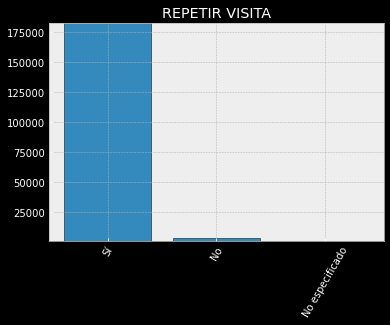

In [52]:
repetir = ["Sí","No","No especificado"]
cantidad = [182106, 3290, 729]

plt.bar(range(3), cantidad, edgecolor = 'black')

plt.xticks(range(3), repetir, rotation=60)
plt.title("REPETIR VISITA")
plt.ylim(min(cantidad)-1, max(cantidad)+1)

plt.show()

#### Esta grafica es muy concreta con los datos que arroja donde segun 180,000 dice que repetiria la visita al museo  donde 

### Tratamiento de unos datos nominales 

In [47]:
#Datos Genero
dataframe_seleccion.loc[dataframe_seleccion['SEXO,N,1,0'] == 1, 'SEXO,N,1,0'] = 'Hombre'
dataframe_seleccion.loc[dataframe_seleccion['SEXO,N,1,0'] == 2, 'SEXO,N,1,0'] = 'Mujer'
#Datos Escolaridad
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 1, 'ESCOLARIDA,N,2,0'] = 'Ninguna'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 2, 'ESCOLARIDA,N,2,0'] = 'Preescolar'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 3, 'ESCOLARIDA,N,2,0'] = 'Primaria'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 4, 'ESCOLARIDA,N,2,0'] = 'Secundaria'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 5, 'ESCOLARIDA,N,2,0'] = 'Estudios técnicos sec-term'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 6, 'ESCOLARIDA,N,2,0'] = 'Normal básica'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 7, 'ESCOLARIDA,N,2,0'] = 'Bachillerato'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 8, 'ESCOLARIDA,N,2,0'] = 'Estudios técnicos prep-term'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 9, 'ESCOLARIDA,N,2,0'] = 'Licenciatura'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 10, 'ESCOLARIDA,N,2,0'] = 'Maestría o Doctorado'
dataframe_seleccion.loc[dataframe_seleccion['ESCOLARIDA,N,2,0'] == 99, 'ESCOLARIDA,N,2,0'] = 'No especifica'
#Datos Ocupacion
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 1, 'OCUPACION,N,2,0'] = 'Funcionarios, directores y jefes'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 2, 'OCUPACION,N,2,0'] = 'Profesionistas y técnicos'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 3, 'OCUPACION,N,2,0'] = 'Trabajadores auxiliares en actividades administrativas'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 4, 'OCUPACION,N,2,0'] = 'Comerciantes, empleados en actividades administrativas'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 5, 'OCUPACION,N,2,0'] = 'Trabajadores en servicos personales y vigilancia'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 6, 'OCUPACION,N,2,0'] = 'Trabajadores en actividades agricolas, ganaderas, forestales, caza y pesca'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 7, 'OCUPACION,N,2,0'] = 'Trabajadores artesanales'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 8, 'OCUPACION,N,2,0'] = 'Operadores de maquinas industrial, ensambladores, choferes y conductores de transporte'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 9, 'OCUPACION,N,2,0'] = 'Trabajadores en actividades elementales y de apoyo'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 10, 'OCUPACION,N,2,0'] = 'Busca trabajo'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 11, 'OCUPACION,N,2,0'] = 'No trabaja'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 11, 'OCUPACION,N,2,0'] = 'Insuficientemente especificada'
dataframe_seleccion.loc[dataframe_seleccion['OCUPACION,N,2,0'] == 11, 'OCUPACION,N,2,0'] = 'No especifica'
#Datos Cultura general
dataframe_seleccion.loc[dataframe_seleccion['MV_CULTURA,N,1,0'] == 0, 'MV_CULTURA,N,1,0'] = 'Sin motivo'
dataframe_seleccion.loc[dataframe_seleccion['MV_CULTURA,N,1,0'] == 1, 'MV_CULTURA,N,1,0'] = 'Con motivo'
#Datos Trasporte que usaron
dataframe_seleccion.loc[dataframe_seleccion['MEDIO_TRAN,N,1,0'] == 1, 'MEDIO_TRAN,N,1,0'] = 'Vehículo particular'
dataframe_seleccion.loc[dataframe_seleccion['MEDIO_TRAN,N,1,0'] == 2, 'MEDIO_TRAN,N,1,0'] = 'Transporte público'
dataframe_seleccion.loc[dataframe_seleccion['MEDIO_TRAN,N,1,0'] == 3, 'MEDIO_TRAN,N,1,0'] = 'Transporte turístico'
dataframe_seleccion.loc[dataframe_seleccion['MEDIO_TRAN,N,1,0'] == 4, 'MEDIO_TRAN,N,1,0'] = 'Taxi'
dataframe_seleccion.loc[dataframe_seleccion['MEDIO_TRAN,N,1,0'] == 5, 'MEDIO_TRAN,N,1,0'] = 'Bicicleta'
dataframe_seleccion.loc[dataframe_seleccion['MEDIO_TRAN,N,1,0'] == 6, 'MEDIO_TRAN,N,1,0'] = 'Caminando'
dataframe_seleccion.loc[dataframe_seleccion['MEDIO_TRAN,N,1,0'] == 7, 'MEDIO_TRAN,N,1,0'] = 'Otro'
dataframe_seleccion.loc[dataframe_seleccion['MEDIO_TRAN,N,1,0'] == 9, 'MEDIO_TRAN,N,1,0'] = 'No especificado'

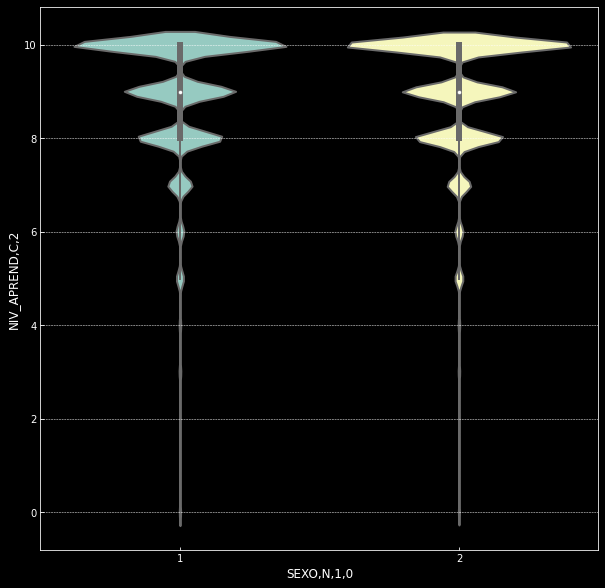

In [40]:
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
sns.violinplot(x='SEXO,N,1,0', y='NIV_APREND,C,2', data= dataframe_seleccion)

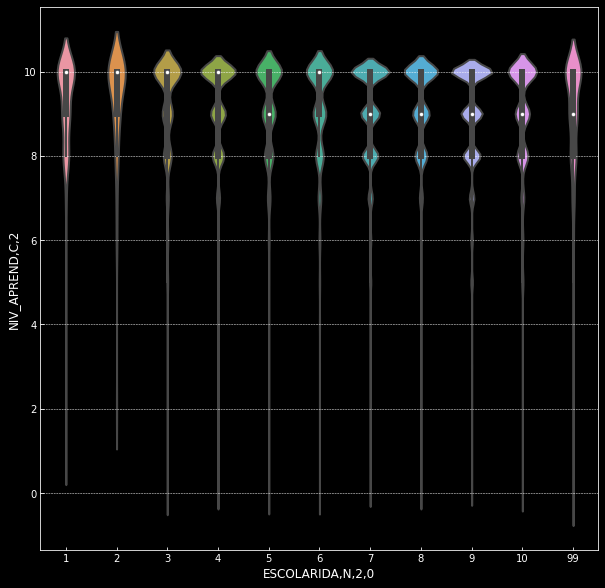

In [39]:
plt.figure(figsize=(10,10))
sns.violinplot(x='ESCOLARIDA,N,2,0', y='NIV_APREND,C,2', data= dataframe_seleccion)

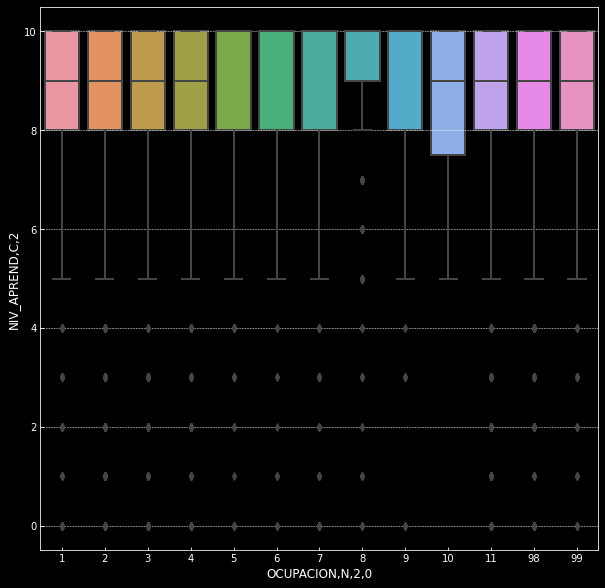

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot(x='OCUPACION,N,2,0', y='NIV_APREND,C,2', data= dataframe_seleccion)

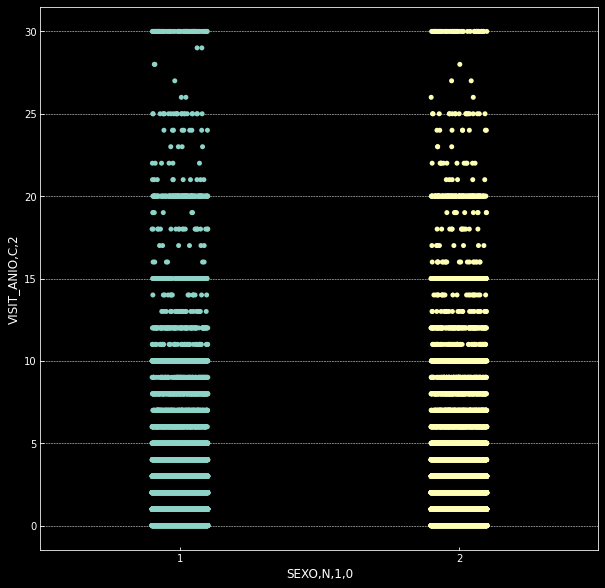

In [42]:
plt.figure(figsize=(10,10))
sns.stripplot(x='SEXO,N,1,0', y='VISIT_ANIO,C,2', data= dataframe_seleccion)

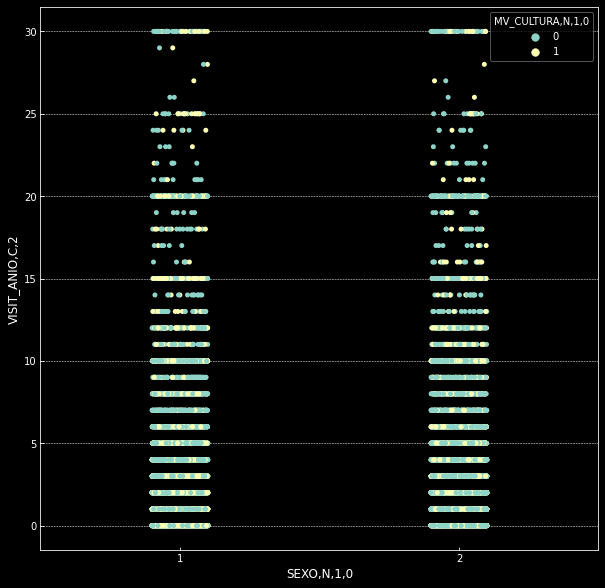

In [43]:
plt.figure(figsize=(10,10))
sns.stripplot(x='SEXO,N,1,0', y='VISIT_ANIO,C,2', data= dataframe_seleccion, hue='MV_CULTURA,N,1,0')

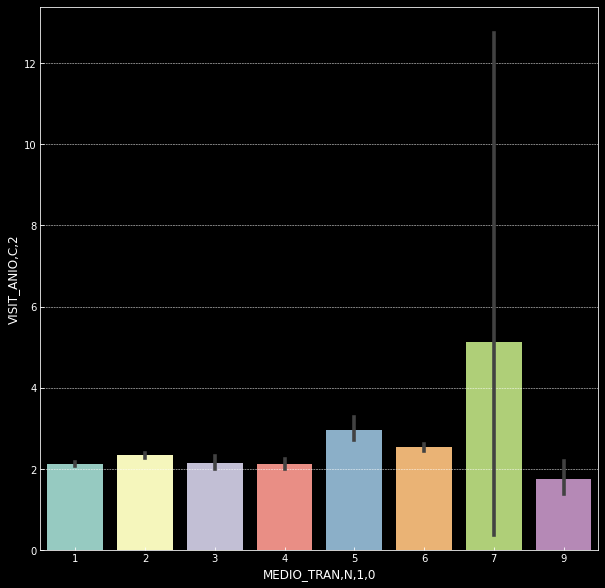

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x='MEDIO_TRAN,N,1,0', y='VISIT_ANIO,C,2', data= dataframe_seleccion)

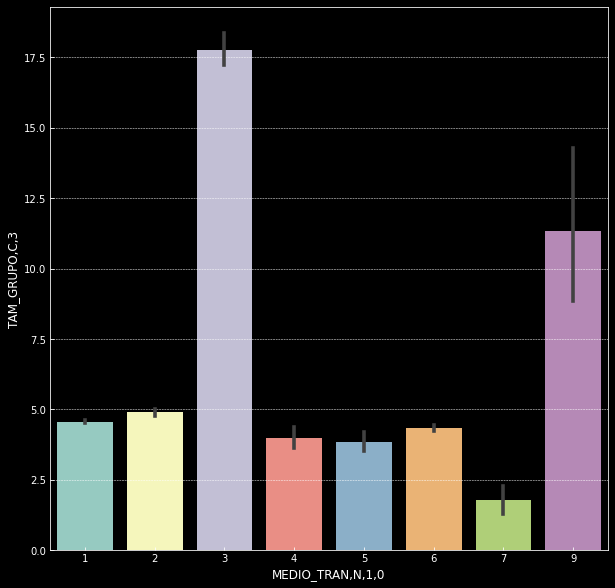

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(x='MEDIO_TRAN,N,1,0', y='TAM_GRUPO,C,3', data= dataframe_seleccion)

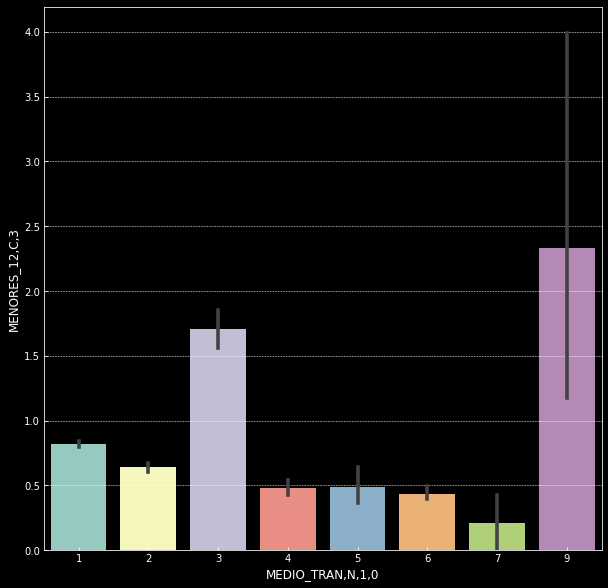

In [46]:
plt.figure(figsize=(10,10))
sns.barplot(x='MEDIO_TRAN,N,1,0', y='MENORES_12,C,3', data= dataframe_seleccion)

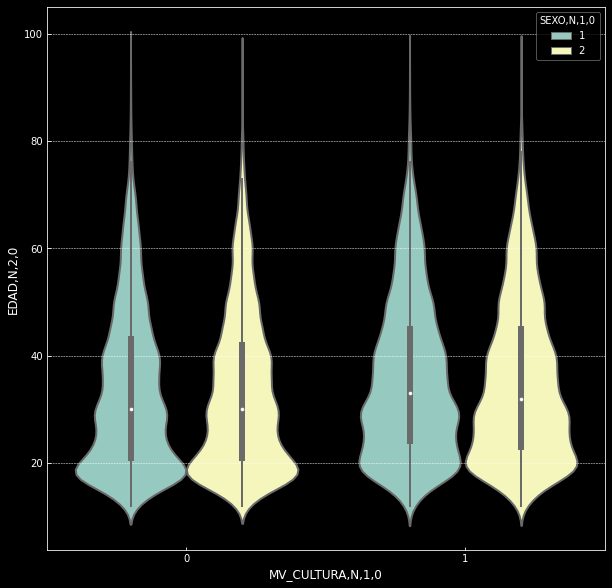

In [47]:
plt.figure(figsize=(10,10))
sns.violinplot(x='MV_CULTURA,N,1,0', y='EDAD,N,2,0', data= dataframe_seleccion, hue='SEXO,N,1,0')

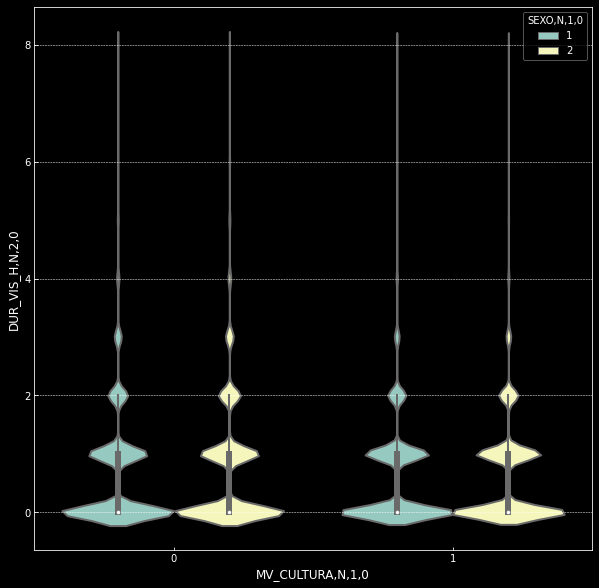

In [48]:
plt.figure(figsize=(10,10))
sns.violinplot(x='MV_CULTURA,N,1,0', y='DUR_VIS_H,N,2,0', data= dataframe_seleccion, hue='SEXO,N,1,0')

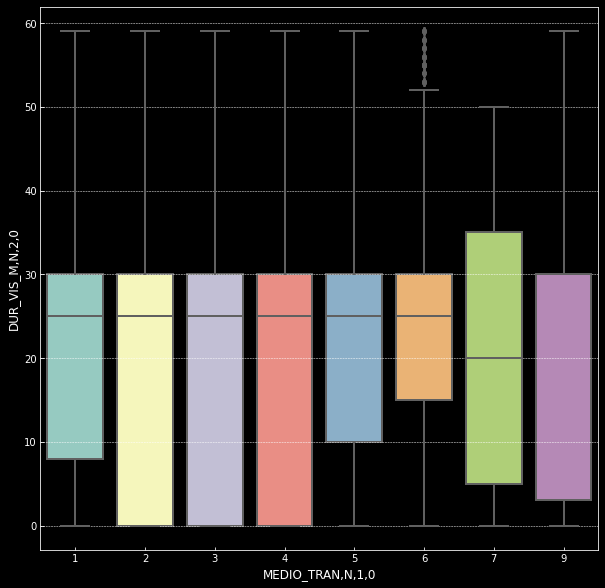

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(x='MEDIO_TRAN,N,1,0', y='DUR_VIS_M,N,2,0', data= dataframe_seleccion)

### Tablas de frecuencias Acumuladas

-Edades

In [61]:
lis = dataframe_seleccion["EDAD,N,2,0"].unique()
#Creamos el dataframe que contendrá las clases
dat = pd.DataFrame(lis, columns=["EDAD,N,2,0"])
#Tabla de frecuencias absolutas
#Obtenes las frecuencias absolutas de cada clase
datafi = pd.crosstab(index=dataframe_seleccion["EDAD,N,2,0"], columns = "Frecuencia absoluta")
dat=datafi
#Tabbla de frecuencia relativa
datahi = 100 * dat["Frecuencia absoluta"] / 50
datahi = datahi.values
#Agregamos nueva columna de frecuentas relativas
dat["Frecuencia relativa"] = datahi 
#Obtenemos las frecuencias absolutas acumuladas
#Sacamos una lista de los valores donde obtendremos la FI
Fi = dat["Frecuencia absoluta"].values

#Recorremos la lista para ir creando una nueva lista con las sumas
#Obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
    b = c + b
    a.append(b)

#Agregamos la nueva columna Fi al Dataframe dat
dat["Frecuencias absolutas acumuladas"] = a 
#Recorremos lista para obtener la frecuencia relativa acumulada
Hi = dat["Frecuencia relativa"].values
#Obtenemos Hi
a = []
b = 0
for c in Hi:
    b = c + b
    a.append(b)

#Agregamos la nueva columna Hi al Dataframe
dat["Frecuencia relativa acumulada"] = a 
dat

col_0,Frecuencia absoluta,Frecuencia relativa,Frecuencias absolutas acumuladas,Frecuencia relativa acumulada
"EDAD,N,2,0",,,,
12,911,1822.0,911,1822.0
13,1382,2764.0,2293,4586.0
14,1962,3924.0,4255,8510.0
15,3207,6414.0,7462,14924.0
16,4737,9474.0,12199,24398.0
...,...,...,...,...
92,9,18.0,180733,361466.0
93,6,12.0,180739,361478.0
95,2,4.0,180741,361482.0


-Visitas al año

In [62]:
lis = dataframe_seleccion["VISIT_ANIO,C,2"].unique()
#Creamos el dataframe que contendrá las clases
dat = pd.DataFrame(lis, columns=["VISIT_ANIO,C,2"])
#Tabla de frecuencias absolutas
#Obtenes las frecuencias absolutas de cada clase
datafi = pd.crosstab(index=dataframe_seleccion["VISIT_ANIO,C,2"], columns = "Frecuencia absoluta")
dat=datafi
#Tabbla de frecuencia relativa
datahi = 100 * dat["Frecuencia absoluta"] / 50
datahi = datahi.values
#Agregamos nueva columna de frecuentas relativas
dat["Frecuencia relativa"] = datahi 
#Obtenemos las frecuencias absolutas acumuladas
#Sacamos una lista de los valores donde obtendremos la FI
Fi = dat["Frecuencia absoluta"].values

#Recorremos la lista para ir creando una nueva lista con las sumas
#Obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
    b = c + b
    a.append(b)

#Agregamos la nueva columna Fi al Dataframe dat
dat["Frecuencias absolutas acumuladas"] = a 
#Recorremos lista para obtener la frecuencia relativa acumulada
Hi = dat["Frecuencia relativa"].values
#Obtenemos Hi
a = []
b = 0
for c in Hi:
    b = c + b
    a.append(b)

#Agregamos la nueva columna Hi al Dataframe
dat["Frecuencia relativa acumulada"] = a 
dat

col_0,Frecuencia absoluta,Frecuencia relativa,Frecuencias absolutas acumuladas,Frecuencia relativa acumulada
"VISIT_ANIO,C,2",,,,
0.0,14229,28458.0,14229,28458.0
1.0,12717,25434.0,26946,53892.0
2.0,10036,20072.0,36982,73964.0
3.0,5435,10870.0,42417,84834.0
4.0,2367,4734.0,44784,89568.0
5.0,1643,3286.0,46427,92854.0
6.0,837,1674.0,47264,94528.0
7.0,423,846.0,47687,95374.0
8.0,515,1030.0,48202,96404.0


-Nivel de aprendizaje

In [63]:
lis = dataframe_seleccion["NIV_APREND,C,2"].unique()
#Creamos el dataframe que contendrá las clases
dat = pd.DataFrame(lis, columns=["NIV_APREND,C,2"])
#Tabla de frecuencias absolutas
#Obtenes las frecuencias absolutas de cada clase
datafi = pd.crosstab(index=dataframe_seleccion["NIV_APREND,C,2"], columns = "Frecuencia absoluta")
dat=datafi
#Tabbla de frecuencia relativa
datahi = 100 * dat["Frecuencia absoluta"] / 50
datahi = datahi.values
#Agregamos nueva columna de frecuentas relativas
dat["Frecuencia relativa"] = datahi 
#Obtenemos las frecuencias absolutas acumuladas
#Sacamos una lista de los valores donde obtendremos la FI
Fi = dat["Frecuencia absoluta"].values

#Recorremos la lista para ir creando una nueva lista con las sumas
#Obtener la frecuencia absoluta acumulada
a = []
b = 0
for c in Fi:
    b = c + b
    a.append(b)

#Agregamos la nueva columna Fi al Dataframe dat
dat["Frecuencias absolutas acumuladas"] = a 
#Recorremos lista para obtener la frecuencia relativa acumulada
Hi = dat["Frecuencia relativa"].values
#Obtenemos Hi
a = []
b = 0
for c in Hi:
    b = c + b
    a.append(b)

#Agregamos la nueva columna Hi al Dataframe
dat["Frecuencia relativa acumulada"] = a 
dat

col_0,Frecuencia absoluta,Frecuencia relativa,Frecuencias absolutas acumuladas,Frecuencia relativa acumulada
"NIV_APREND,C,2",,,,
0.0,469,938.0,469,938.0
1.0,183,366.0,652,1304.0
2.0,346,692.0,998,1996.0
3.0,613,1226.0,1611,3222.0
4.0,612,1224.0,2223,4446.0
5.0,2966,5932.0,5189,10378.0
6.0,3016,6032.0,8205,16410.0
7.0,9168,18336.0,17373,34746.0
8.0,33553,67106.0,50926,101852.0
